In [518]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2, f, t
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

### Задание 1


In [43]:
def rel_freq(x):
  freqs = [[value, x.count(value) / len(x)] for value in sorted(set(x))] 
  return freqs

In [185]:
def generate_norm(n_dist, n_elem):
  distr = np.array([0.0] * n_elem)
  mn = []
  vr = []
  for i in range(n_dist):
    a = np.random.randint(-100, 100)
    b = np.random.randint(-100, 100)
    while a >= b:
      a = np.random.randint(-100, 100)
      b = np.random.randint(-100, 100)
    distr += np.random.uniform(a, b, n_elem)
    mn.append((b + a)/2)
    vr.append((b - a) ** 2 / 12)
  return distr, mn, vr

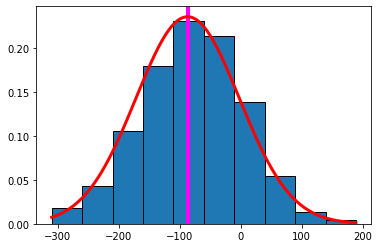

In [244]:
df = generate_norm(15, 512)
mu = sum(df[1])
sk = np.sqrt(sum(df[2]))
###
plt.axvline(mu, color = 'fuchsia',
            linewidth = 4.0)
###
plt.hist(df[0], bins = 10,
         weights = np.ones_like(df[0]) / len(df[0]),
         edgecolor = 'black')
###
x = np.arange(min(df[0]), max(df[0]))
plt.plot(x, 50 * norm.pdf(x, mu, sk),
         color = 'red',
         linewidth = 3)

In [245]:
my_chi2test(df[0])

N = 512
mean = -78.913
sq =  83.312
NORMAL  chi:  7.461403975390953   pvalue:  0.5891957683655382
UNIFORM  chi:  201.99596942822797   pvalue:  1.2639889151259338e-38
EXPONENTIAL  chi:  646.248745615222   pvalue:  2.458853889217463e-133


R2 = 0.9766235354444651


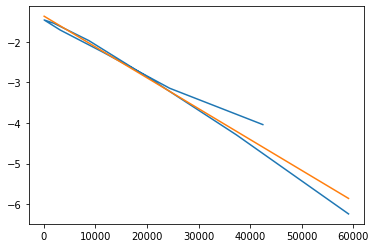

In [246]:
anom_normal_test(df[0])

### Задание 2

In [490]:
def generate_chi2(n_dist, n_elem):
  distr = np.array([0.0] * n_elem)
  for i in range(n_dist):
    loc = np.random.randint(-100, 100)
    sko = np.random.randint(1, 100)
    temp_dispr = np.random.normal(loc, sko, n_elem)
    z_score = (temp_dispr - loc) / sko
    distr += z_score ** 2
  return distr

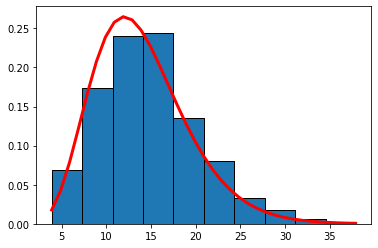

In [491]:
df = generate_chi2(15, 512)
###
plt.hist(df, bins = 10,
         weights = np.ones_like(df) / len(df),
         edgecolor = 'black')
###
x = np.arange(min(df), max(df))
plt.plot(x, 3.3 * chi2.pdf(x, df = 14),
         color = 'red',
         linewidth = 3)

CHI2  chi:  14.236827146802344   pvalue:  0.11414670241159038


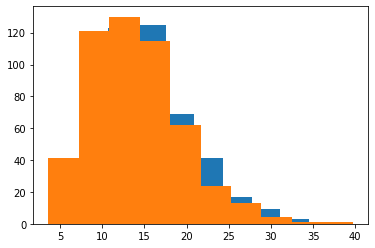

In [492]:
chi2_df = np.random.chisquare(14, 512)
x1 = plt.hist(df, bins = 10)[0]
x2 = plt.hist(chi2_df, bins = 10)[0]
test = chi2_contingency([x1, x2])
print('CHI2  chi: ', test[0], '  pvalue: ', test[1])

### Задание 3

In [487]:
df1 = np.random.chisquare(15, 512)
df2 = np.random.chisquare(10, 512)
fisher = df1 / df2

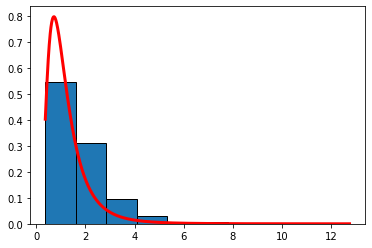

In [488]:
###
plt.hist(fisher, bins = 10,
         weights = np.ones_like(fisher) / len(fisher),
         edgecolor = 'black')
###
x = np.arange(min(fisher), max(fisher), 0.01)
plt.plot(x, f.pdf(x, 15, 10),
         color = 'red',
         linewidth = 3)

FISHER  chi:  10.036488475281066   pvalue:  0.34753934795453584


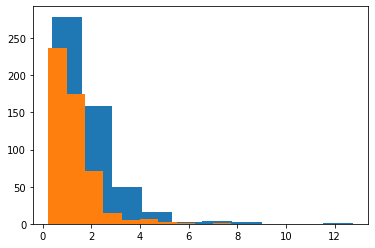

In [489]:
ff = np.random.f(15, 10, 512)
x1 = plt.hist(fisher, bins = 10)[0]
x2 = plt.hist(ff, bins = 10)[0]

for i in range(len(x1)):
  if x1[i] == 0:
    x1[i] = 1
  if x2[i] == 0:
    x2[i] = 1
test = chi2_contingency([x1, x2])
print('FISHER  chi: ', test[0], '  pvalue: ', test[1])

### Задание 4

In [560]:
y0 = np.random.normal(0, 1, 512)


yn = np.array([0.0] * 512)
for i in range(4):
  yn += np.random.normal(0, 1, 512) ** 2

t_distr = y0 / np.sqrt(yn/5)

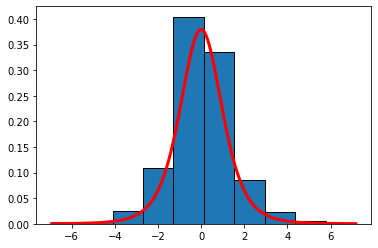

In [561]:
###
plt.hist(t_distr, bins = 10,
         weights = np.ones_like(fisher) / len(fisher),
         edgecolor = 'black')
###
x = np.arange(min(t_distr), max(t_distr), 0.01)
plt.plot(x, t.pdf(x, 5),
         color = 'red',
         linewidth = 3)

t-student  chi:  7.005934606190062   pvalue:  0.6365014975682817


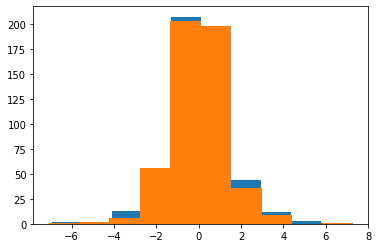

In [566]:
tt = np.random.standard_t(5, 512)
x1 = plt.hist(t_distr, bins = 10)[0]
x2 = plt.hist(tt, bins = 10)[0]

for i in range(len(x1)):
  if x1[i] == 0:
    x1[i] = 1
  if x2[i] == 0:
    x2[i] = 1

test = chi2_contingency([x1, x2])
print('t-student  chi: ', test[0], '  pvalue: ', test[1])

### Вспомогательные функции

In [211]:
# метод анамарфоз для нормального распределения
def anom_normal_test(df1): 
  g = int(1 + np.floor(np.log2(len(df1))))
  h = (max(df1) - min(df1)) / g
  
  Z = [0] * (g + 1)
  for i in range(len(Z)):
    Z[i] = min(df1) + (h * i)
  data = [0] * g

  for i in range(len(df1)):
    for j in range(len(Z) - 1):
      if df1[i] >= Z[j] and df1[i] <= Z[j + 1]:
        data[j] += 1
  
  mask = [round((Z[i] + Z[i + 1]) / 2, 2) for i in range(len(Z) - 1)]
  range_df = []
  for i in range(len(data)):
    range_df += [mask[i]] * data[i]
  
  mn = 0
  chas = rel_freq(range_df)
  for i in range(len(chas)):
    if chas[i][0] != mask[i]:
      chas = (chas[0 : i] + [[mask[i], 1e-15]] + chas[i:])
      break

  for i in range(len(chas)):
    mn += chas[i][0] * chas[i][1]
  vr = 0
  for i in range(len(chas)):
    vr += ((chas[i][0] - mn) ** 2) * chas[i][1]

  sq = np.sqrt(vr)

  ln_freq = np.log(np.array([i[1] for i in chas]))

  base = [i[0] for i in chas]

  otkl = [0] * g
  for i in range(len(base)):
    otkl[i] = (base[i] - mn) ** 2

  plt.plot(otkl, ln_freq)
  

  otkl = np.array(otkl).reshape((-1, 1))
  ln_freq = np.array(ln_freq)
  
  model = LinearRegression()
  model.fit(otkl, ln_freq)
  a = model.coef_[0]
  b = model.intercept_

  plt.plot([min(otkl), max(otkl)], [min(otkl) * a + b, max(otkl) * a + b])
  mod_ln = (otkl.reshape(-1) * a + b)
  
  
  
  r2 = (np.corrcoef(ln_freq, mod_ln) ** 2)[0][1]
  print('R2 =', r2)

In [209]:
### тест хи квадрат на нормальное, экспоненциальное, равномерное распределения
def my_chi2test(df1): 
  g = int(1 + np.floor(np.log2(len(df1))))
  h = (max(df1) - min(df1)) / g
  
  Z = [0] * (g + 1)
  for i in range(len(Z)):
    Z[i] = min(df1) + (h * i)
  data = [0] * g
  
  for i in range(len(df1)):
    for j in range(len(Z) - 1):
      if df1[i] >= Z[j] and df1[i] <= Z[j + 1]:
        data[j] += 1

  for i in range(len(data)):
    if data[i] == 0:
      data[i] = 1

  range_df = []
  mask = [round((Z[i] + Z[i + 1]) / 2, 2) for i in range(len(Z) - 1)]
  for i in range(len(data)):
    range_df += [mask[i]] * data[i]

  
  mn = 0
  chas = rel_freq(range_df)
  for i in range(len(chas)):
    if chas[i][0] != mask[i]:
      chas = (chas[0 : i] + [[mask[i], 1e-15]] + chas[i:])
      break

  mn = 0
  for i in range(len(chas)):
    mn += chas[i][0] * chas[i][1]

  vr = 0
  for i in range(len(chas)):
    vr += ((chas[i][0] - mn) ** 2) * chas[i][1]

  sq = np.sqrt(vr)
  print("N =", len(df1))
  print('mean =', round(mn, 3))
  print('sq = ', round(sq, 3))
  ###
  raspr = sorted([round(i, 3) for i in list(sq * np.random.randn(len(df1)) + mn)])
  
  n_chas = [0] * g
  for i in range(len(raspr)):
    for j in range(len(Z) - 1):
      if raspr[i] >= Z[j] and raspr[i] <= Z[j + 1]:
        n_chas[j] += 1
  
  test = chi2_contingency([data, n_chas])[0:2]
  print('NORMAL  chi: ', test[0], '  pvalue: ', test[1])
  ###
  uni = sorted([round(i, 3) for i in np.random.uniform(min(df1), max(df1), len(df1))])
  
  uni_chas = [0] * g
  for i in range(len(uni)):
    for j in range(len(Z) - 1):
      if uni[i] >= Z[j] and uni[i] <= Z[j + 1]:
        uni_chas[j] += 1

  
  uni_test = chi2_contingency([data, uni_chas])[0:2]
  print('UNIFORM  chi: ', uni_test[0], '  pvalue: ', uni_test[1])
  ###
  alfa = round(1/mn, 3)
  ex = sorted(np.random.exponential(np.abs(mn), len(df1)))

  ex_chas = [0] * g
  for i in range(len(ex)):
    for j in range(len(Z) - 1):
      if ex[i] >= Z[j] and ex[i] <= Z[j + 1]:
        ex_chas[j] += 1
  ex_test = chi2_contingency([data, ex_chas])[0:2]
  print('EXPONENTIAL  chi: ', ex_test[0], '  pvalue: ', ex_test[1])
  #plt.hist(df1, bins = g)